(sec-bloch)=
# Bloch sphere

While Eq. {eq}`qubit-purestate` can describe any qubit state, there is a better expression suitable for visualizing the qubit state.
Writing the complex coefficient in the polar expression,
$c_0 = r_0 e^{i \phi_0}$ and $c_1 = r_1 e^{i \phi_1}$ where $r_i$ and $\phi_i$ are modulus and argument. Then, we remove a global phase as 

$$
\ket{\psi} = r_0 e^{i \phi_0} \ket{0} + r_1 e^{i \phi_1} \ket{1} = e^{i \phi_0} \left( r_0  \ket{0} + r_1 e^{i (\phi_1-\phi_0)} \ket{1} \right) \simeq r_0  \ket{0} + r_1 e^{i \theta} \ket{1}
$$

where $\phi=\phi_1-\phi_0,\ \phi \in [0, 2\pi)$ and "$\simeq$" means "equivalent up to global phase".  Now, the normalization condition becomes $r_0^2 + r_1^2 = 1$.  Since $r_0$ and $r_1$ are positive, we can write them as $r_0 = \cos\left(\frac{\theta}{2}\right)$ and $r_1 = \sin\left(\frac{\theta}{2}\right)$ with $0 < \theta < \pi$.  Now the general qubit state is written as

$$
\ket{\psi} = \cos\left(\frac{\theta}{2}\right) \ket{0} + \sin\left(\frac{\theta}{2}\right) e^{i \phi} \ket{1},\quad 0 \le \theta \le \pi, \, 0 \le \phi < 2 \pi .
$$(bloch-vector)

This expression suggests that any pure state can be map to a point on the surface of a unit sphere using spherical coordinates $\theta$ and $\phi$.   The north pole of the sphere ($\theta=0$) corresponds to $\ket{0}$ and the south pole ($\theta=\pi$) to $\ket{1}$ (recall that the global phase $e^{i \phi}$ can be omitted.  When $\theta = \frac{\pi}{2}$ and $\phi=0$, we obtain $|+\rangle$ and when $\theta = \frac{\pi}{2}$ and $\phi=\pi$, we have $|-\rangle$. 

The sphere is known as *Bloch sphere* and the arrow from the center of the sphere to the point on the surface is called *Bloch vector*. Each Bloch vector corresponds to a qubit state. 

:::{admonition} Qiskit note: Bloch sphere
:class: tip

Qiskit provides four tools to visualize the Bloch sphere and vector.

1. Use `plot_bloch_vector` in `qiskit.visuakization` if $\theta$ and $\phi$ are known.
> `plot_bloch_vector([r,theta,phi], coord_type='spherical', figsize=(w,h) )`  
[API reference:plot_bloch_vector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_vector.html)

2. Use `plot_bloch_multivector` if a state vector is known.  
> `plot_bloch_multivector(state)`  
> `state` is a quantum state. Various format is allowed, including Statevector class objects.
For other optional arguments.  
[API reference:plot_bloch_multivector](https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html)

3. Use `draw` method associated with `statevector` class
> psi`.draw('mpl')`  
> where psi is a `staetvector` class object.  `mpl` specifies the use of `matplotlib` module.  This method is just a front end to plot-bloch-multivector.   
[API reference:Statevector.draw](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.draw.html#qiskit.quantum_info.Statevector.draw)

4. We can even draw evolution of the Bloch vector as a movie using `visualize_transition`.
> visualize_transition(qc,fpg=50, spg=1)
> where `qc` is a quantum circuit (I will explain it later.)   See the following documentation for other parameters.  
[API reference:visualize_transition](https://qiskit.org/documentation/stubs/qiskit.visualization.visualize_transition.html)

:::


---
**Qiskit Example** {numref}`%s <sec-bloch>`.1 &nbsp; The following example plots the Bloch vectors of $|0\rangle$, $|1\rangle$, and $|\pm\rangle$.  To plot all of them at once, we use a tensor product of all vectors.  In Qiskit, tensor product is done by "^".

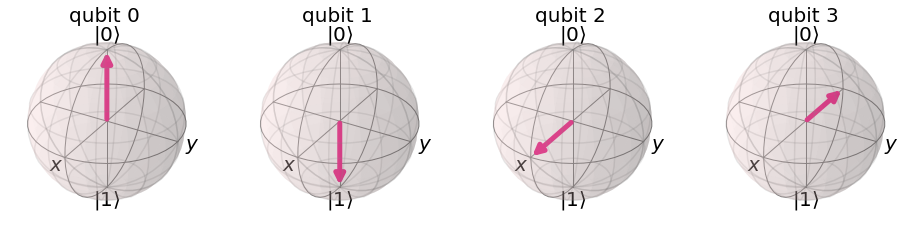

In [1]:
# import 
# importhe visualization tool
from qiskit.visualization import plot_bloch_multivector

# impor
# import basis vectors
from qiskit.opflow import Zero, One, Plus, Minus

# show Bloch vector for |0>, |1>, |+>, and |->
plot_bloch_multivector(Minus^Plus^One^Zero)



---
**Qiskit Example** {numref}`%s <sec-bloch>`.4 &nbsp; Plot the Bloch vectors of the states $|L\rangle$ and $|R\rangle$ discuessed in **Qiskit Example** {numref}`%s <sec-purestates>`.2.

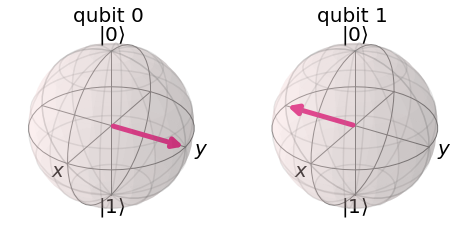

In [2]:
import numpy as np
# generate basis |L> and |R>
L = (Zero + 1j* One)/np.sqrt(2)
R = (Zero - 1j* One)/np.sqrt(2)
# show their Bloch vectors
plot_bloch_multivector(R^L)


---
**Qiskit Example** {numref}`%s <sec-bloch>`.3 &nbsp;  A statevector is initially $|0\rangle$.  It is rotated around $y$, $z$, and $x$ by angle $\frac{\pi}{2}$ for each rotation. It is done by rotation gates `ry`, `rz`, and `rx`. (They are introduced in next chapter.) Construction of quantum circuits will be discussed later in great detail.   The Bloch vector should come back to the starting point. See the animation.

In [3]:
%%capture
# The output block is disabled.

# load numpy and qiskit
import numpy as np
from qiskit import *

# create an empty quantum circuit
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)

# add rotation gates to the circuit
qc.ry(np.pi/2,0)
qc.rz(np.pi/2,0)
qc.rx(np.pi/2,0)

# load the visdualization tool
from qiskit.visualization import visualize_transition

# generate a movie (it will be shown in next cell,
movie=visualize_transition(qc,fpg=20, spg=1)


In [4]:
# Show the movie
movie